In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0.466365,0.418713,0.471159,0.410529,0.473931,0.410694,0.476904,0.410736,0.462236,0.409946,...,0.921682,0.481604,0.942375,0.437354,0.939458,0.495475,0.964212,0.429540,0.962033,M
1,0.456579,0.418596,0.463098,0.409894,0.466358,0.410155,0.469362,0.410358,0.453000,0.409494,...,0.921575,0.480299,0.942386,0.434440,0.939431,0.491975,0.965401,0.424414,0.962316,M
2,0.459104,0.418420,0.464739,0.409264,0.468021,0.409550,0.470461,0.409853,0.455255,0.408983,...,0.921229,0.481251,0.939440,0.436142,0.939334,0.494590,0.965532,0.426580,0.962403,M
3,0.459525,0.418369,0.465294,0.409109,0.468267,0.409376,0.470768,0.409703,0.455943,0.408862,...,0.921027,0.481812,0.938984,0.436462,0.939272,0.495696,0.965605,0.427653,0.962531,M
4,0.459595,0.418387,0.465584,0.409104,0.468861,0.409333,0.471267,0.409612,0.456050,0.408865,...,0.920839,0.482181,0.938719,0.436852,0.939106,0.496413,0.965617,0.428334,0.962830,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.466965,0.420017,0.472756,0.411201,0.476337,0.411208,0.479672,0.411227,0.462037,0.411236,...,0.919743,0.477379,0.933092,0.442072,0.937491,0.482992,0.965935,0.432632,0.964417,A
491,0.457953,0.420064,0.464178,0.410816,0.468004,0.410513,0.471585,0.410126,0.453064,0.411096,...,0.919875,0.478615,0.935367,0.440964,0.937497,0.483004,0.967948,0.432698,0.966044,A
492,0.458094,0.420063,0.464376,0.410803,0.468315,0.410504,0.471935,0.410121,0.453230,0.411017,...,0.919929,0.478583,0.935063,0.441206,0.938108,0.483027,0.967274,0.432643,0.965616,A
493,0.462590,0.420961,0.467617,0.411655,0.470796,0.411498,0.473792,0.411253,0.457646,0.411745,...,0.919872,0.477832,0.934559,0.441369,0.938103,0.483126,0.966582,0.432661,0.965585,A


In [3]:
df = df.rename(columns={66: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,Output
0,0.466365,0.418713,0.471159,0.410529,0.473931,0.410694,0.476904,0.410736,0.462236,0.409946,...,0.921682,0.481604,0.942375,0.437354,0.939458,0.495475,0.964212,0.429540,0.962033,M
1,0.456579,0.418596,0.463098,0.409894,0.466358,0.410155,0.469362,0.410358,0.453000,0.409494,...,0.921575,0.480299,0.942386,0.434440,0.939431,0.491975,0.965401,0.424414,0.962316,M
2,0.459104,0.418420,0.464739,0.409264,0.468021,0.409550,0.470461,0.409853,0.455255,0.408983,...,0.921229,0.481251,0.939440,0.436142,0.939334,0.494590,0.965532,0.426580,0.962403,M
3,0.459525,0.418369,0.465294,0.409109,0.468267,0.409376,0.470768,0.409703,0.455943,0.408862,...,0.921027,0.481812,0.938984,0.436462,0.939272,0.495696,0.965605,0.427653,0.962531,M
4,0.459595,0.418387,0.465584,0.409104,0.468861,0.409333,0.471267,0.409612,0.456050,0.408865,...,0.920839,0.482181,0.938719,0.436852,0.939106,0.496413,0.965617,0.428334,0.962830,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.466965,0.420017,0.472756,0.411201,0.476337,0.411208,0.479672,0.411227,0.462037,0.411236,...,0.919743,0.477379,0.933092,0.442072,0.937491,0.482992,0.965935,0.432632,0.964417,A
491,0.457953,0.420064,0.464178,0.410816,0.468004,0.410513,0.471585,0.410126,0.453064,0.411096,...,0.919875,0.478615,0.935367,0.440964,0.937497,0.483004,0.967948,0.432698,0.966044,A
492,0.458094,0.420063,0.464376,0.410803,0.468315,0.410504,0.471935,0.410121,0.453230,0.411017,...,0.919929,0.478583,0.935063,0.441206,0.938108,0.483027,0.967274,0.432643,0.965616,A
493,0.462590,0.420961,0.467617,0.411655,0.470796,0.411498,0.473792,0.411253,0.457646,0.411745,...,0.919872,0.477832,0.934559,0.441369,0.938103,0.483126,0.966582,0.432661,0.965585,A


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (495, 66)
Labels shape = (495,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['M', 'notYMCA', 'notYMCA', 'A', 'C', 'M', 'C', 'M', 'Y', 'notYMCA',
       'notYMCA', 'notYMCA', 'C', 'notYMCA', 'Y', 'C', 'M', 'C', 'Y', 'M',
       'notYMCA', 'C', 'notYMCA', 'Y', 'M', 'M', 'M', 'C', 'M', 'notYMCA',
       'C', 'Y', 'Y', 'Y', 'C', 'C', 'C', 'M', 'C', 'notYMCA', 'C', 'M',
       'M', 'notYMCA', 'M', 'M', 'notYMCA', 'M', 'A', 'Y', 'C', 'Y', 'M',
       'Y', 'Y', 'M', 'C', 'Y', 'notYMCA', 'C', 'M', 'notYMCA', 'M', 'M',
       'C', 'Y', 'M', 'A', 'notYMCA', 'M', 'Y', 'M', 'M', 'C', 'Y', 'C',
       'notYMCA', 'Y', 'M', 'C', 'C', 'notYMCA', 'M', 'notYMCA', 'C', 'C',
       'M', 'Y', 'C', 'M', 'notYMCA', 'M', 'M', 'notYMCA', 'Y', 'C', 'M',
       'M', 'M'], dtype=object)

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.8282828282828283, 0.8282828282828283, 0.8282828282828283)

<AxesSubplot:title={'center':'Confusion Matrix - Pose Gesture Recognition'}>

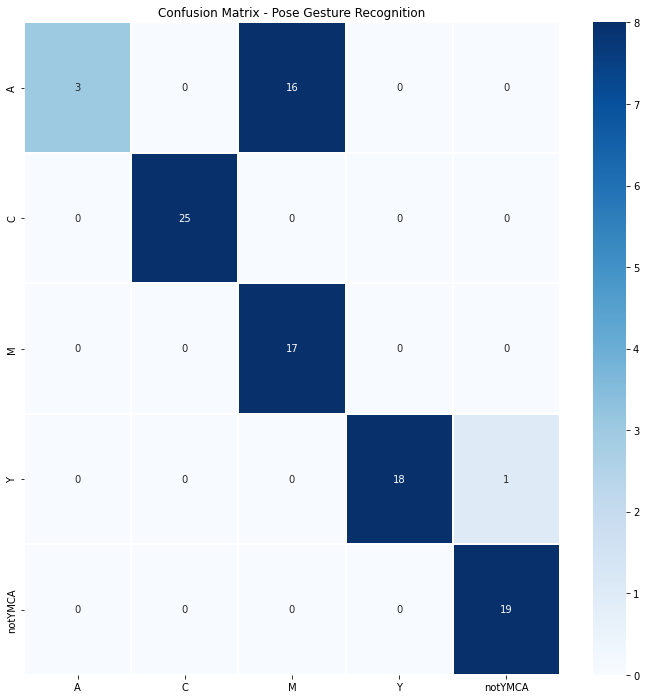

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [str(x) for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Pose Gesture Recognition")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [41]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)